In [19]:
import numpy as np
from numpy import sqrt as sq
from numpy import linalg

import matplotlib.pyplot as plt

In [20]:
#Projektion: Matrix (fuer homogene Koordinaten), Datenpunkte (affin gegeben)

def projection(P,data):
    x = homogenize(data)
    y = np.dot(P,x)
    y = affinize(y)
    return y[0:2,:]

In [21]:
#Diese Funktion erzeugt die Ecken eines Quaders, der ueber Intervalle gegeben ist

def get_corners(qx,qy,qz):
    x = np.zeros((3,8), dtype = float)
    count = 0
    ind = 0
    for i in qx:
        for j in qy:
            for k in qz:
                x[0,ind] = i
                x[1,ind] = j
                x[2,ind] = k
                ind += 1
    return x

In [9]:
def homogenize(data):
    s = data.shape
    x = np.zeros((4,s[1]), dtype = float)
    x[0:3,:] = data
    w = np.ones(s[1])
    x[3,:] = w
    return x

In [10]:
def affinize(y):
    D = np.diag(y[3,:])
    y = np.dot(y,np.linalg.inv(D))
    return y

# Skript orthogonale Parallelprojektion

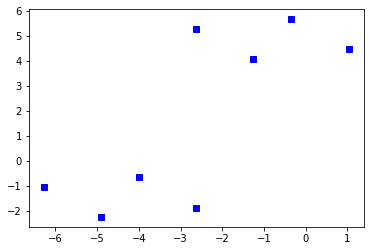

In [22]:
#Voreinstellung Betrachterpunkt, Ursprung Bildebene, Up-Vektor

Pb = np.array([9.,10.,2.])
Po = np.array([5.,2.,6.])
e3 = np.array([0.,0.,1.])

#Verschiebung des Betrachterpunktes und Berechnung des Nomalvektors v

Pbneu = Pb - Po
dist = linalg.norm(Pbneu,2)
v = Pbneu/dist

#Berechnung des up-Vektors

#Zunaechst Verschiebung des dritten Einheitsvektors

z = e3 - Po

#Anschliessend Projektion dessen auf die Bildebene und Normierung

u = z - (np.dot(z,v))*v
up = u/linalg.norm(u,2)

#Berechnung des ersten Vektors des Betrachterkoordinatensystems

w = np.cross(up,v)

#Aufstellung der Transfomormaionsmatrizen: Verschiebung, Basis, Projektion

T = np.array([[1.,0,0,-Po[0]],[0,1.,0,-Po[1]],[0,0,1.,-Po[2]],[0,0,0,1.]])
B = np.array([[w[0],w[1],w[2],0],[up[0],up[1],up[2],0],[v[0],v[1],v[2],0],[0,0,0,1.]])
P1 = np.array([[1.,0,0,0],[0,1.,0,0],[0,0,0,0],[0,0,0,1.]])

Par = np.dot(P1,np.dot(B,T))

points = get_corners([1,3],[1,5],[2,10])

y = projection(Par,points)

#print(y)
plt.plot(y[0,:],y[1,:],'bs')
plt.show()



# Skript Perspektivprojektion

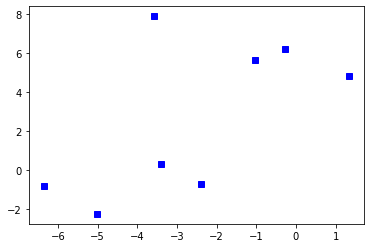

In [24]:
#Voreinstellung Betrachterpunkt, Ursprung Bildebene, Up-Vektor

Pb = np.array([6.,10.,1.])
Po = np.array([5.,2.,6.])
e3 = np.array([0.,0.,1.])

#Verschiebung des Betrachterpunktes und Berechnung des Nomalvektors v

Pbneu = Pb - Po
dist = linalg.norm(Pbneu,2)
v = Pbneu/dist

#Berechnung des up-Vektors

#Zunaechst Verschiebung des dritten Einheitsvektors

z = e3 - Po

#Bestimmung des up-Vektors über Geradengleichung

#Richtungsvektor

di = z - Pbneu
a = np.dot(di,Pbneu)
b = dist**2

t = -b/a

u = Pbneu + t*di
up = u/linalg.norm(u,2)
w = np.cross(up,v)

P2 = np.array([[1.,0,0,0],[0,1.,0,0],[0,0,0,0],[0,0,-1./dist,1]])
B = np.array([[w[0],w[1],w[2],0],[up[0],up[1],up[2],0],[v[0],v[1],v[2],0],[0,0,0,1.]])
T = np.array([[1.,0,0,-Po[0]],[0,1.,0,-Po[1]],[0,0,1.,-Po[2]],[0,0,0,1.]])

Per = np.dot(P2,np.dot(B,T))

points = get_corners([1,3],[1,5],[2,10])

y = projection(Per,points)
#y = projection2(Per,[-1,1.],[-1,1],[-1.,1.])

plt.plot(y[0,:],y[1,:],'bs')
plt.show()


# Aufgabe 3

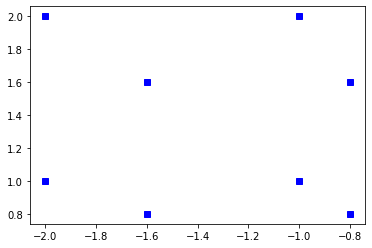

In [13]:
#Voreinstellung Betrachterpunkt, Ursprung Bildebene, Up-Vektor

Pb = np.array([0,0,-4.])
Po = np.array([0,0,0])
e3 = np.array([0,1.,0])

#Verschiebung des Betrachterpunktes und Berechnung des Nomalvektors v

Pbneu = Pb - Po
dist = linalg.norm(Pbneu,2)
v = Pbneu/dist

#Berechnung des up-Vektors

#Zunaechst Verschiebung des dritten Einheitsvektors

z = e3 - Po

#Bestimmung des up-Vektors über Geradengleichung

#Richtungsvektor

di = z - Pbneu
a = np.dot(di,Pbneu)
b = dist**2

t = -b/a

u = Pbneu + t*di
up = u/linalg.norm(u,2)
w = np.cross(up,v)

P2 = np.array([[1.,0,0,0],[0,1.,0,0],[0,0,0,0],[0,0,-1./dist,1]])
B = np.array([[w[0],w[1],w[2],0],[u[0],u[1],u[2],0],[v[0],v[1],v[2],0],[0,0,0,1.]])
T = np.array([[1.,0,0,-Po[0]],[0,1.,0,-Po[1]],[0,0,1.,-Po[2]],[0,0,0,1.]])

Per = np.dot(P2,np.dot(B,T))

data = get_corners([1,2],[1,2],[0,1])

y = projection(Per,data)
#y = projection2(Per,[-1,1.],[-1,1],[-1.,1.])

plt.plot(y[0,:],y[1,:],'bs')
plt.show()


# Parallelogramm, zweites Blatt

In [14]:
#Verschiebung
T1 = np.array([[1.,0.,-1.],[0,1.,-2.],[0,0,1.]])
print(T1)

[[ 1.  0. -1.]
 [ 0.  1. -2.]
 [ 0.  0.  1.]]


In [15]:
#Scherung
T2 = np.array([[1.,-1./8.,0],[-1./4.,1,0],[0,0,1]])
print(T2)

[[ 1.    -0.125  0.   ]
 [-0.25   1.     0.   ]
 [ 0.     0.     1.   ]]


In [16]:
#Skalierung anisotrop
T3 =  np.array([[8./31.,0,0],[0,4./31.,0],[0,0,1]])
print(T3)

[[0.25806452 0.         0.        ]
 [0.         0.12903226 0.        ]
 [0.         0.         1.        ]]


In [17]:
T = np.dot(T3,np.dot(T2,T1))
print(T)

[[ 0.25806452 -0.03225806 -0.19354839]
 [-0.03225806  0.12903226 -0.22580645]
 [ 0.          0.          1.        ]]


In [70]:
#Die Matrix hat mit geeignetem Vorfakto diese Form ... 
print(248.*T)

[[ 64.  -8. -48.]
 [ -8.  32. -56.]
 [  0.   0. 248.]]


In [18]:
#Test
X = np.array([[1.,2.,1.],[5.,3.,1.],[6.,11.,1.],[2.,10.,1.]])
X = np.transpose(X)
print(np.dot(T,X))          

[[0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 1. 1.]]
